In [ ]:
include("../modules/IVTmodel.jl")


In [1]:
using Pkg
Pkg.activate("../IVTmodel")
Pkg.instantiate()
include("../modules/IVTmodel.jl")
#Generates settings for parameters used
fittingmodel = setupmodel_IVT4()
#Imports calibration data from csv files
modeldata = importakamadata()
osumidata = importosumidata()
#Imports PPiase validation data
PPiasedata = importakamaPPiasedata();
akamafittedparametersmatrix = Matrix(CSV.read("../outputs/fittedparameters.csv", DataFrame,header=false))
fittedparamslist = reshape(akamafittedparametersmatrix,(size(akamafittedparametersmatrix)[1],))
covariancemat = Matrix(CSV.read("../outputs/covariancematrix.csv", DataFrame,header=false))
fittedparams = fullparameterset(fittingmodel,fittedparamslist)
printresidual(fittingmodel,modeldata,osumidata,fittedparamslist)

  Activating project at `C:\Users\ChemeGrad2021\Documents\Braatz Group\MRNA Synthesis\Published code\IVT2.0\IVTmodel`
Precompiling project...
  ? Metrics
Precompiling Metrics
        Info Given Metrics was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? Metrics
[ Info: Precompiling Metrics [cb9f3049-315b-4f05-b90c-a8adaec4da78]
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
[ Info: Skipping precompilation since __precompile__(false). Importing Metrics [cb9f3049-315b-4f05-b90c-a8adaec4da78].
┌ Warning: Replacing docs for `Metrics.bin_to_cat :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:243
┌ Warning: Replacing docs for `Metrics.confusion_matrix :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:243
┌ Warning: Replacing docs for `Metri

Model has 24 fitted parameters, 16 of which have a bayesian prior


┌ Warning: Replacing docs for `Metrics.global_stats :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:243


Total Residual:                        1115.7
Components of residual:
Concentration Trajectories (Figure 2): 455.1
Initial Reaction Rate (Figure 3A):     200.1
Mg2PPi solubility (Figure 3B):         221.0
Parameter priors:                      152.9
pH Effect Data:                        86.5


In [17]:
pregls = [  4.001471165141637
  3.6104368697941376
  5.360590650718022
  5.845317908596088
  2.8166058193996895
 -3.6394231027354427
 -7.075595325565645
  1.3979400086720377
 -4.400306948754228
  1.6261071530202857
  1.1452813957385837
 -7.1995628501078786
 -9.445400959521441
  1.0809524026815467
  6.063955609464895e-29
  0.6416119280911703
  1.6347192995659983
  4.604626269868236
  3.1129976887750446
  3.8538737086530745
  5.020301797322221
  3.7065277023523486
 -3.8908196040406726]

23-element Vector{Float64}:
  4.001471165141637
  3.6104368697941376
  5.360590650718022
  5.845317908596088
  2.8166058193996895
 -3.6394231027354427
 -7.075595325565645
  1.3979400086720377
 -4.400306948754228
  1.6261071530202857
  1.1452813957385837
 -7.1995628501078786
 -9.445400959521441
  1.0809524026815467
  6.063955609464895e-29
  0.6416119280911703
  1.6347192995659983
  4.604626269868236
  3.1129976887750446
  3.8538737086530745
  5.020301797322221
  3.7065277023523486
 -3.8908196040406726

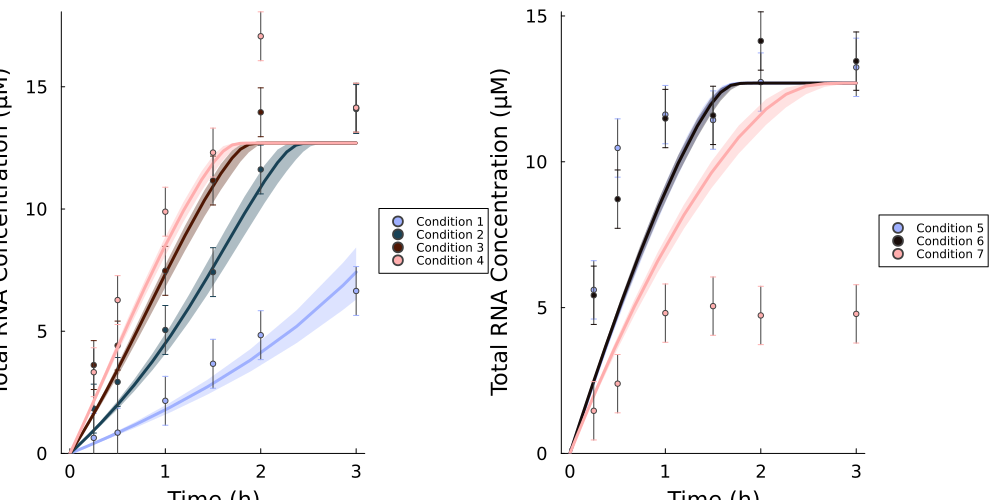

In [18]:
pregfilename = "../data/external/pregljc/pregljcdata.csv"
plt1 = plotfromcsv(fittingmodel,pregls,covariancemat,pregfilename, range = [1,2,3,4],plotsize = (400,400),dataerrorbars = true, multiplot = false,maximumyield = false, precip = true, seperateDNA = false, mcuncertainty = true, OAccounterion = false)
plt2 = plotfromcsv(fittingmodel,pregls,covariancemat,pregfilename, range = [5,6,7],plotsize = (400,400),dataerrorbars = true, multiplot = false,maximumyield = false, precip = true, seperateDNA = false, mcuncertainty = true, OAccounterion = false)
plot(plt1,plt2, size = (1000,500))

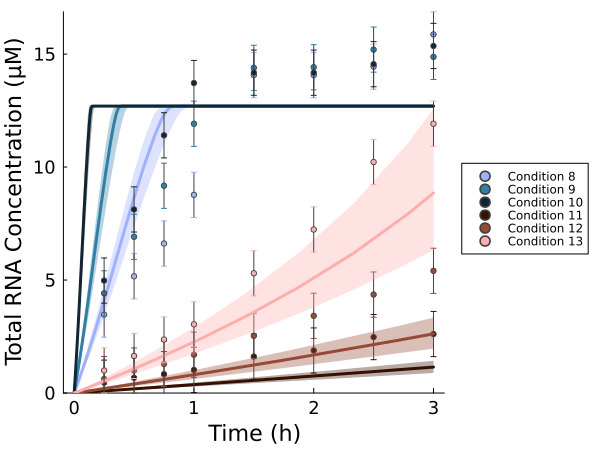

In [19]:
pregfilename = "../data/external/pregljc/pregljcdata.csv"
plt = plotfromcsv(fittingmodel,pregls,covariancemat,pregfilename,range = [8,9,10,11,12,13],plotsize = (600,450),dataerrorbars = true, multiplot = false,maximumyield = false, precip = true, seperateDNA = true, mcuncertainty = true, OAccounterion = false)

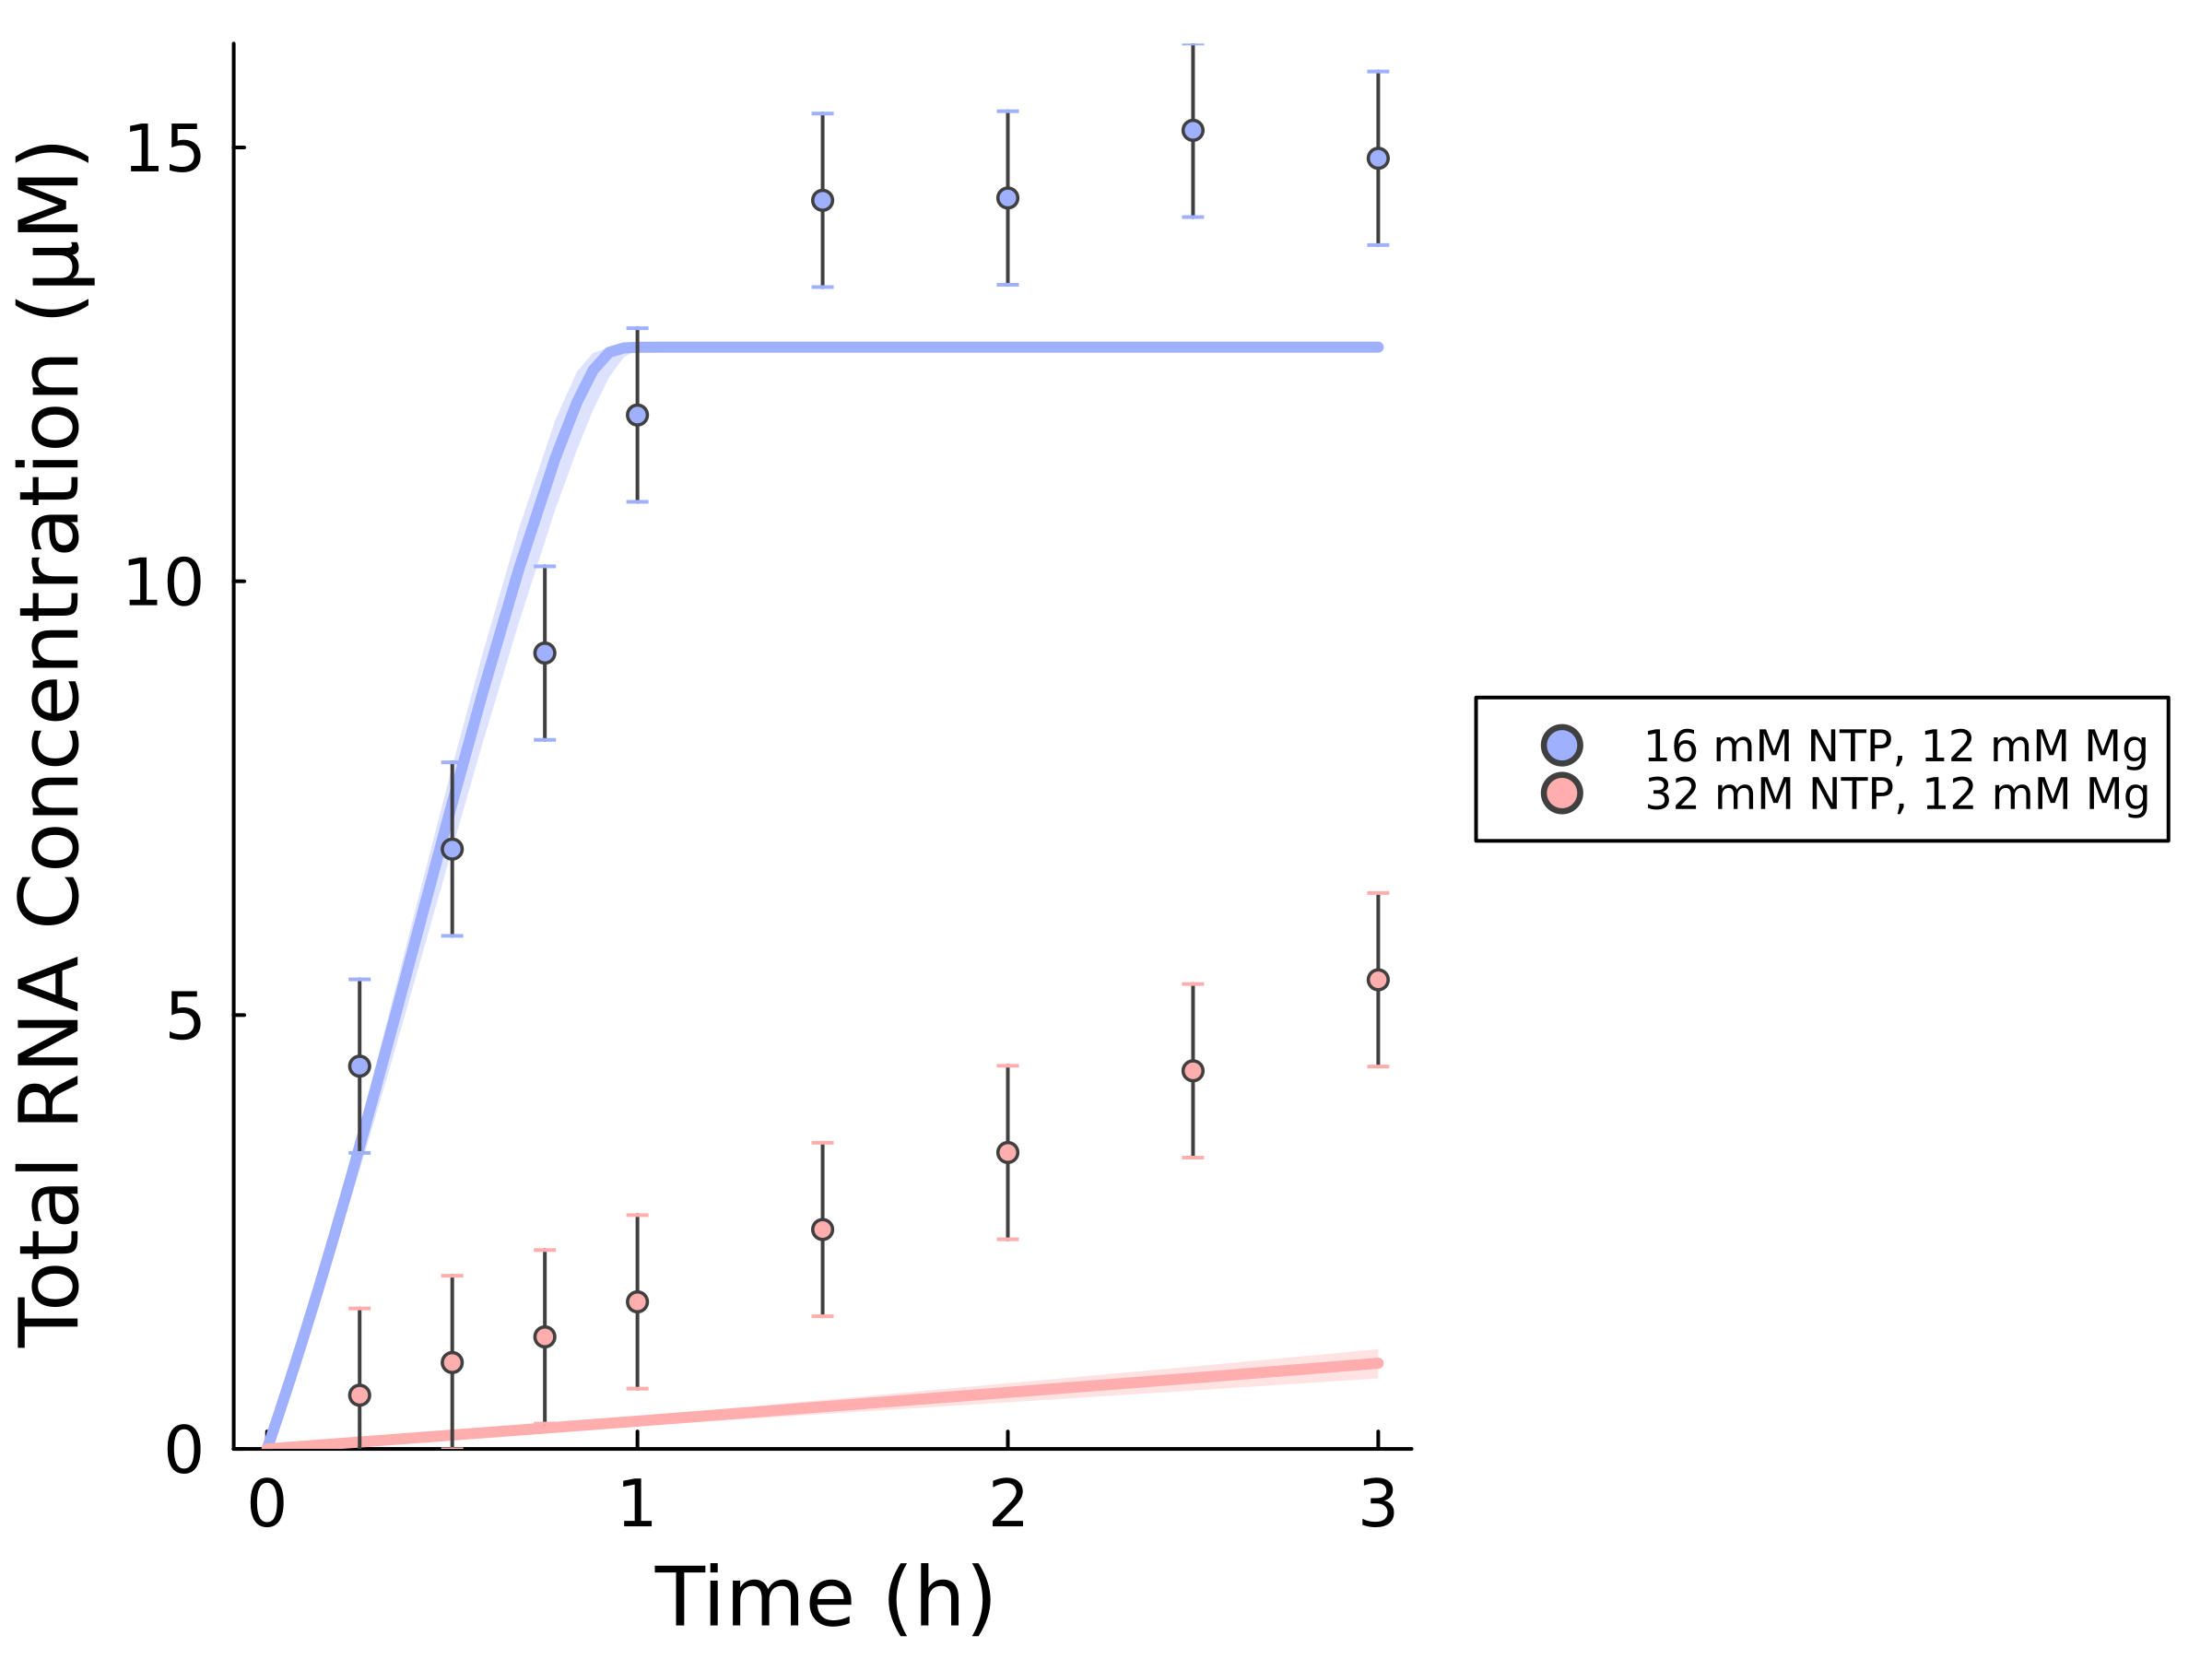

In [20]:
pregfilename = "../data/external/pregljc/pregljcdata.csv"
plt = plotfromcsv(fittingmodel,pregls,covariancemat,pregfilename,range = [9,12],labels = ["16 mM NTP, 12 mM Mg", "32 mM NTP, 12 mM Mg"], plotsize = (600,450),dataerrorbars = true, multiplot = false,maximumyield = false, precip = true, seperateDNA = false, mcuncertainty = true, OAccounterion = false)
plot!(dpi = 400)
savefig(plt,"../figures/GM6_27/preg1.png")
plt

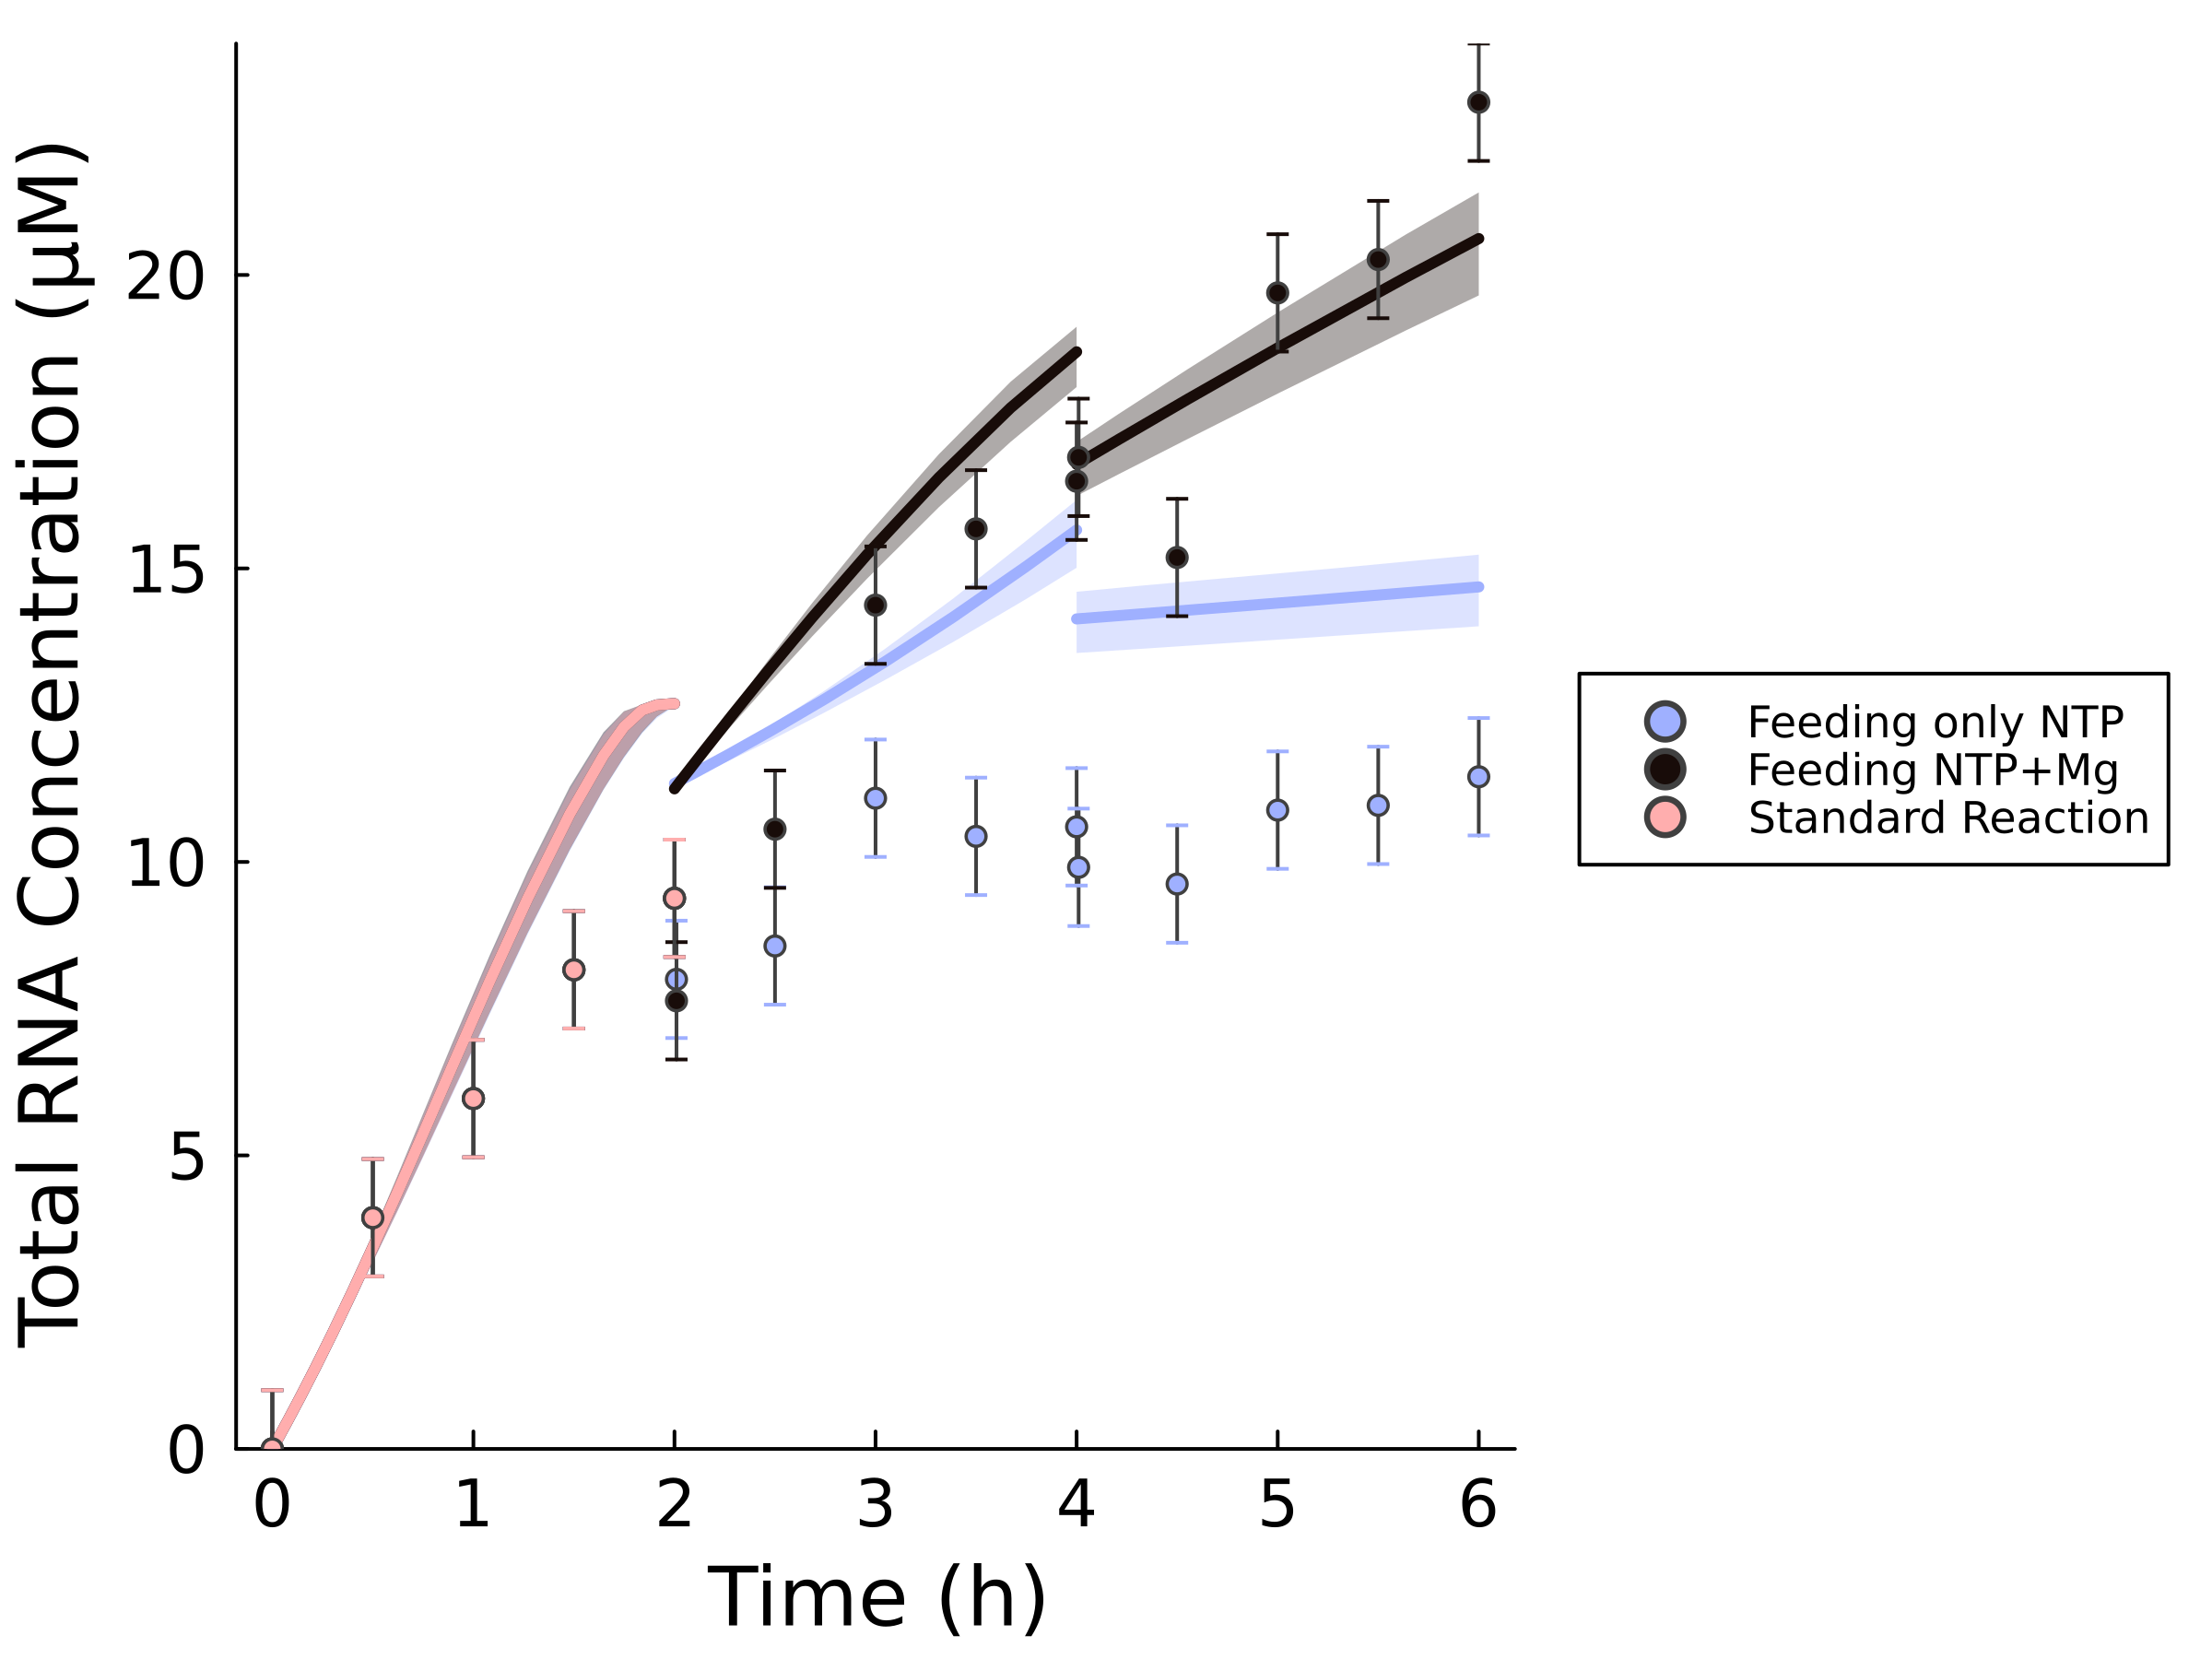

In [21]:
pregfilename = "../data/external/pregljc/pregljcinitialfedbatch.csv"
plt = plot()
discretefeedingscheduleNTP = [[2, 0e-3, 3e-3, 3e-3, 3e-3, 3e-3, 0.0, 0.12] [4, 0e-3, 3e-3, 3e-3, 3e-3, 3e-3, 0.0, 0.12] [Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]'
discretefeedingscheduleMgNTP = [[2, 9e-3, 3e-3, 3e-3, 3e-3, 3e-3, 0.0, 0.129] [4, 9e-3, 3e-3, 3e-3, 3e-3, 3e-3, 0.0, 0.129] [Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]'
discretefeedingschedulenull = reshape([Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],(1,8))
discretefeedingschedules = [discretefeedingscheduleNTP,discretefeedingscheduleMgNTP,discretefeedingschedulenull]
plotfedbatchfromcsv!(plt,fittingmodel,pregls,covariancemat,pregfilename,discretefeedingschedules; plotsize = (600,450), labels = ["Feeding only NTP", "Feeding NTP+Mg", "Standard Reaction"], range = [1,2,3],dataerrorbars = true, seperateDNA = false, OAccounterion = false)
plot!(dpi = 400)
savefig(plt,"../figures/GM6_27/pregfeeding1.png")
plt

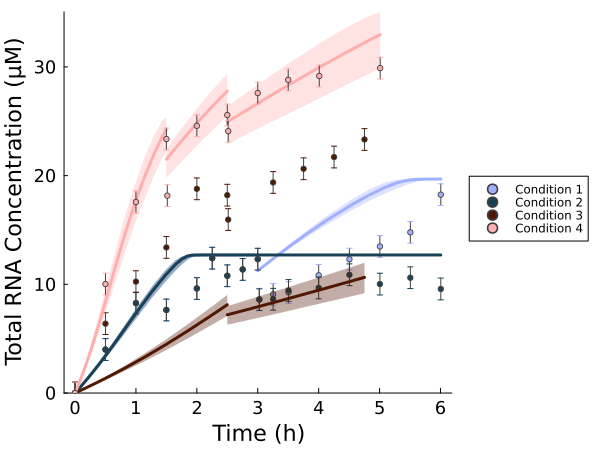

In [23]:
pregGFPfilename = "../data/external/pregljc/pregljcfeeding2GFP.csv"
plt = plot()
discretefeedingscheduleGFP4 = [[3, 9e-3, 3e-3, 3e-3, 3e-3, 3e-3, 0.0, 0.129] [Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]'
discretefeedingschedulenull = reshape([Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],(1,8))
discretefeedingscheduleGFP8 = [[2.5, 9e-3, 3e-3, 3e-3, 3e-3, 3e-3, 0.0, 0.129] [Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]'
discretefeedingscheduleGFP82 = [[1.5, 9e-3, 3e-3, 3e-3, 3e-3, 3e-3, 0.0, 0.129] [2.5, 9e-3, 3e-3, 3e-3, 3e-3, 3e-3, 0.0, 0.129] [Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]'

discretefeedingschedules = [discretefeedingscheduleGFP4,discretefeedingschedulenull,discretefeedingscheduleGFP8,discretefeedingscheduleGFP82]
plotfedbatchfromcsv!(plt,fittingmodel,pregls,covariancemat,pregGFPfilename,discretefeedingschedules; plotsize = (600,450), range = [1,2,3,4],dataerrorbars = true, seperateDNA = false, OAccounterion = false)
plt

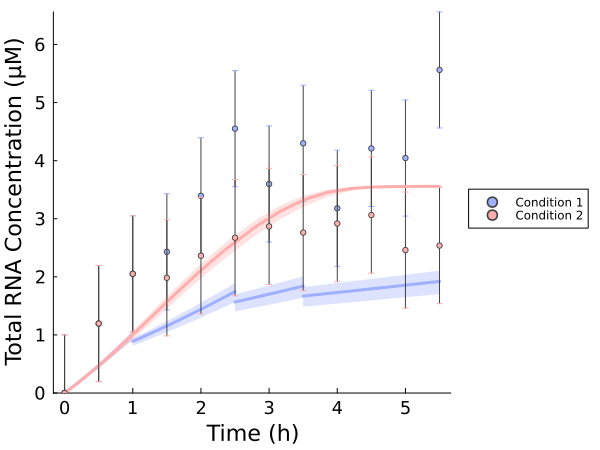

In [25]:
CASlist = fittedparamslist
pregCASfilename = "../data/external/pregljc/pregljcfeeding2CAS.csv"
plt = plot()
discretefeedingscheduleCAS4 = [[1, 9e-3, 3e-3, 3e-3, 3e-3, 3e-3, 0.0, 0.129] [2.5, 9e-3, 3e-3, 3e-3, 3e-3, 3e-3, 0.0, 0.129] [3.5, 9e-3, 3e-3, 3e-3, 3e-3, 3e-3, 0.0, 0.129] [Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]'
discretefeedingschedulenull = reshape([Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],(1,8))
discretefeedingscheduleCAS8 = [[1.5, 9e-3, 3e-3, 3e-3, 3e-3, 3e-3, 0.0, 0.129] [3.5, 9e-3, 3e-3, 3e-3, 3e-3, 3e-3, 0.0, 0.129] [Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]'

discretefeedingschedules = [discretefeedingscheduleCAS4,discretefeedingschedulenull]
plotfedbatchfromcsv!(plt,fittingmodel,CASlist,covariancemat,pregCASfilename,discretefeedingschedules; plotsize = (600,450), range = [1,2],dataerrorbars = true, seperateDNA = false, OAccounterion = false)
plt

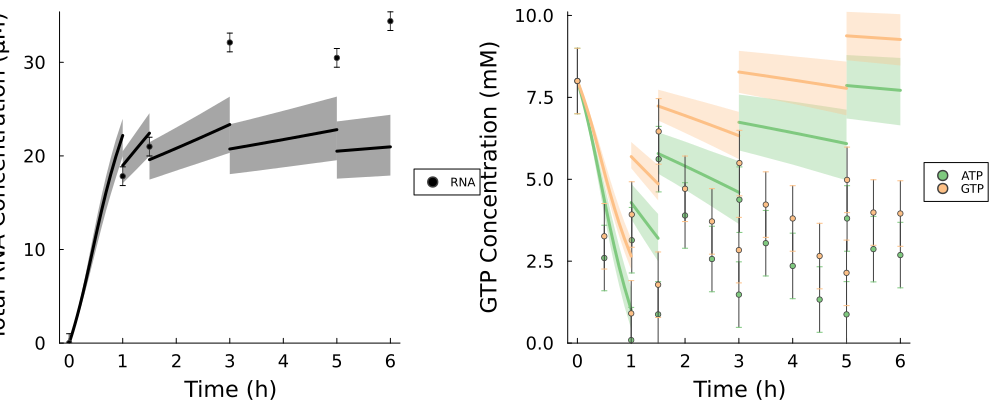

In [26]:
preground3filename = "../data/external/pregljc/pregljcfeedinground3.csv"
plt = plot()
discretefeedingschedule = [[1, 9e-3, 4e-3, 4e-3, 4e-3, 4e-3, 0.0, 0.169] [1.5, 9e-3, 4e-3, 4e-3, 4e-3, 4e-3, 0.0, 0.169] [3.0, 9e-3, 4e-3, 4e-3, 4e-3, 4e-3, 0.0, 0.169] [5.0, 9e-3, 4e-3, 4e-3, 4e-3, 4e-3, 0.0, 0.169] [Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]'
discretefeedingschedules = [discretefeedingschedule,discretefeedingschedule,discretefeedingschedule]
plt1 = plot()
plotfedbatchfromcsv!(plt1,fittingmodel,pregls,covariancemat,preground3filename,discretefeedingschedules; labels = ["RNA"], plotsize = (600,450), range = [1],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :greys)
plt2 = plot()
plotfedbatchfromcsv!(plt2,fittingmodel,pregls,covariancemat,preground3filename,discretefeedingschedules; labels = ["ATP","GTP"], plotsize = (600,450), range = [2,3],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :Accent_3)
plot(plt1,plt2, size = (1000,400),bottommargin = 5mm)

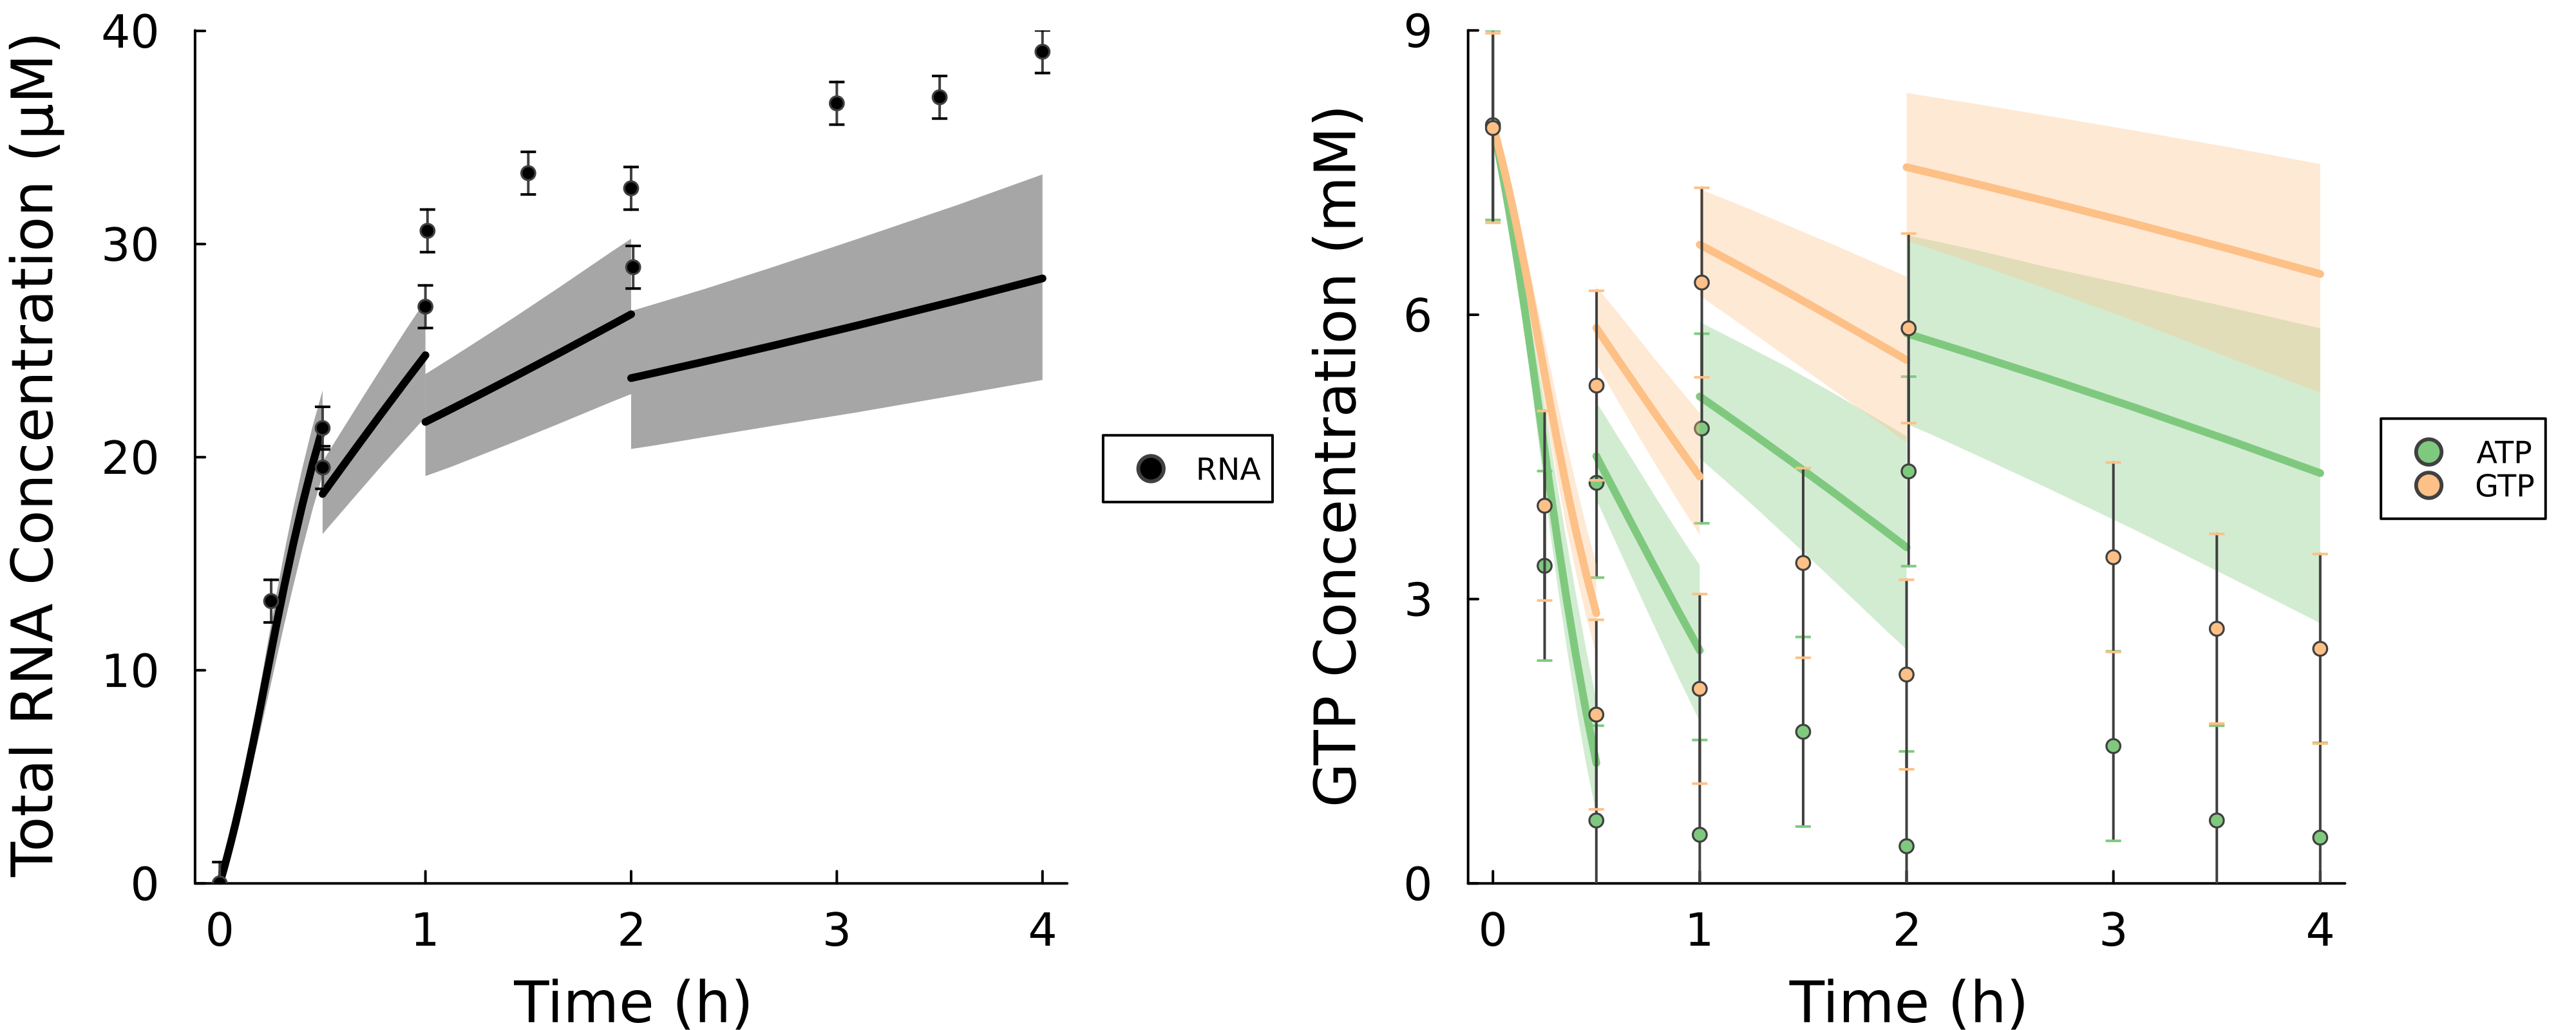

In [27]:
preground3filename = "../data/external/pregljc/pregljcfeedinground3.csv"
plt = plot()
discretefeedingschedule = [[0.5, 9e-3, 4e-3, 4e-3, 4e-3, 4e-3, 0.0, 0.169] [1.0, 9e-3, 4e-3, 4e-3, 4e-3, 4e-3, 0.0, 0.169] [2.0, 9e-3, 4e-3, 4e-3, 4e-3, 4e-3, 0.0, 0.169] [Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]'
discretefeedingschedules = [discretefeedingschedule,discretefeedingschedule,discretefeedingschedule]
plt1 = plot()
plotfedbatchfromcsv!(plt1,fittingmodel,pregls,covariancemat,preground3filename,discretefeedingschedules; labels = ["RNA"], plotsize = (600,450), range = [4],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :greys)
plt2 = plot()
plotfedbatchfromcsv!(plt2,fittingmodel,pregls,covariancemat,preground3filename,discretefeedingschedules; labels = ["ATP","GTP"], plotsize = (600,450), range = [5,6],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :Accent_3)
plt = plot(plt1,plt2, size = (1000,400),bottommargin = 5mm, leftmargin = 5mm)
plot!(dpi = 400)
savefig(plt,"../figures/GM6_27/pregfeeding2.png")
plt

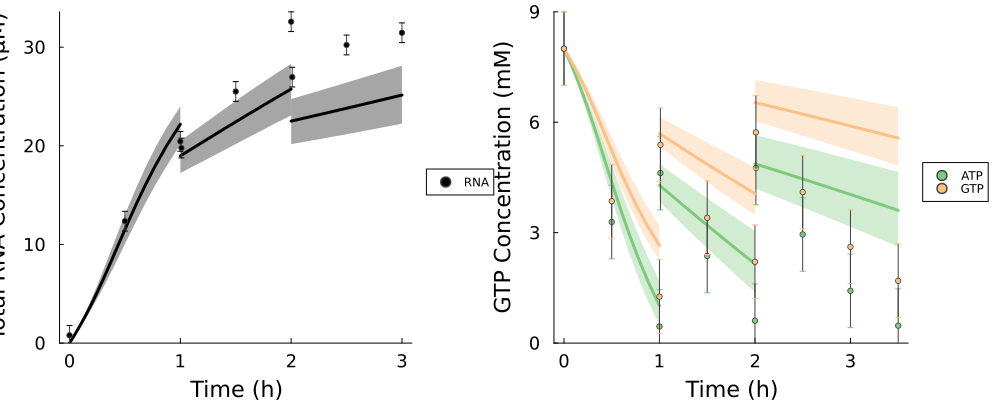

In [28]:
preground3filename = "../data/external/pregljc/pregljcfeedinground3.csv"
plt = plot()
discretefeedingschedule = [[1.0, 9e-3, 4e-3, 4e-3, 4e-3, 4e-3, 0.0, 0.169] [2.0, 9e-3, 4e-3, 4e-3, 4e-3, 4e-3, 0.0, 0.169] [Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]'
discretefeedingschedules = [discretefeedingschedule,discretefeedingschedule,discretefeedingschedule]
plt1 = plot()
plotfedbatchfromcsv!(plt1,fittingmodel,pregls,covariancemat,preground3filename,discretefeedingschedules; labels = ["RNA"], plotsize = (600,450), range = [7],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :greys)
plt2 = plot()
plotfedbatchfromcsv!(plt2,fittingmodel,pregls,covariancemat,preground3filename,discretefeedingschedules; labels = ["ATP","GTP"], plotsize = (600,450), range = [8,9],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :Accent_3)
plot(plt1,plt2, size = (1000,400),bottommargin = 5mm)

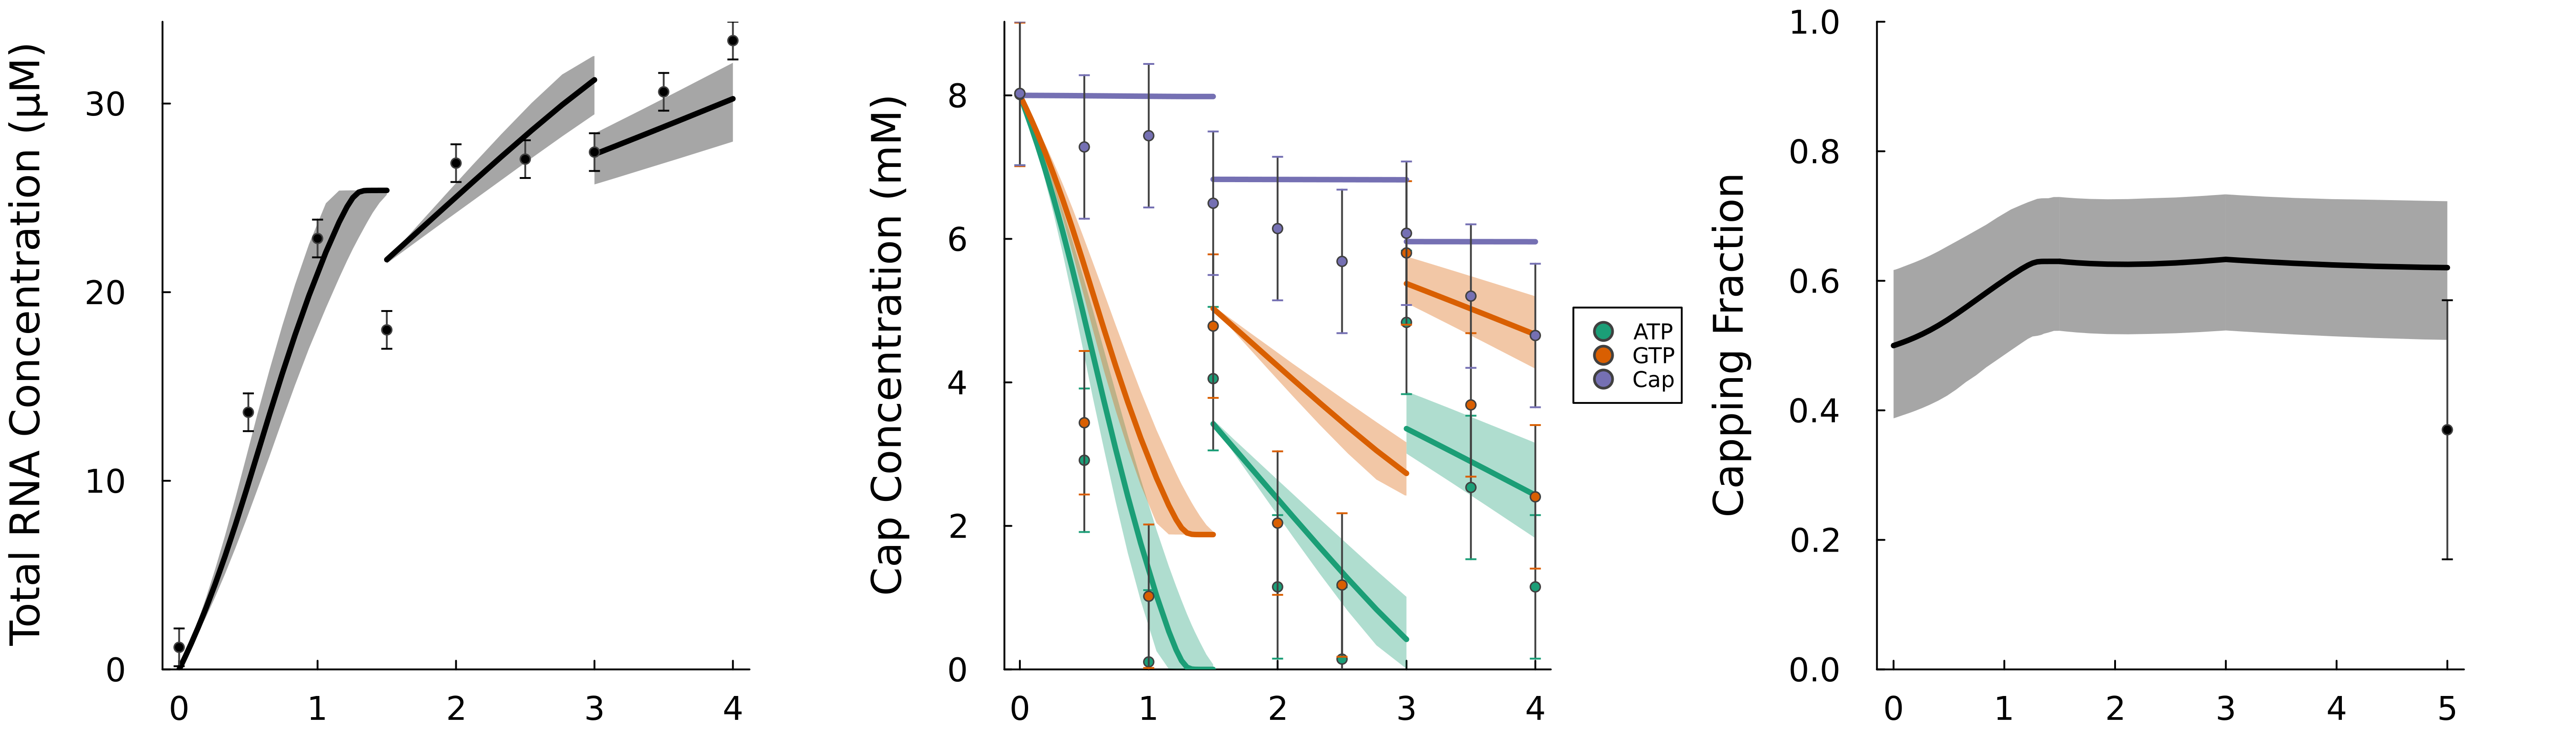

In [29]:
preground3filename = "../data/external/pregljc/pregljccapping.csv"
plt = plot()
discretefeedingschedule = [[1.5, 9e-3, 4e-3, 4e-3, 4e-3, 4e-3, 0.0, 0.169] [3.0, 9e-3, 4e-3, 4e-3, 4e-3, 4e-3, 0.0, 0.169] [Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]'
discretefeedingschedules = [discretefeedingschedule,discretefeedingschedule,discretefeedingschedule]
plt1 = plot()
plotfedbatchfromcsv!(plt1,fittingmodel,pregls,covariancemat,preground3filename,discretefeedingschedules; labels = [""], plotsize = (600,450), range = [1],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :greys)
plt2 = plot()
plotfedbatchfromcsv!(plt2,fittingmodel,pregls,covariancemat,preground3filename,discretefeedingschedules; labels = ["ATP", "GTP", "Cap"], plotsize = (600,450), range = [2,3,4],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :Dark2_3)
plt3 = plot()
plotfedbatchfromcsv!(plt3,fittingmodel,pregls,covariancemat,preground3filename,discretefeedingschedules; labels = [""], plotsize = (600,450), range = [5],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :greys)
plot!(ylims = (0,1))
plt = plot(plt1,plt2,plt3,layout = (1,3),size = (1400,400), leftmargin = 8mm)
plot!(dpi = 400)
savefig(plt,"../figures/GM6_27/pregcapping.png")
plt

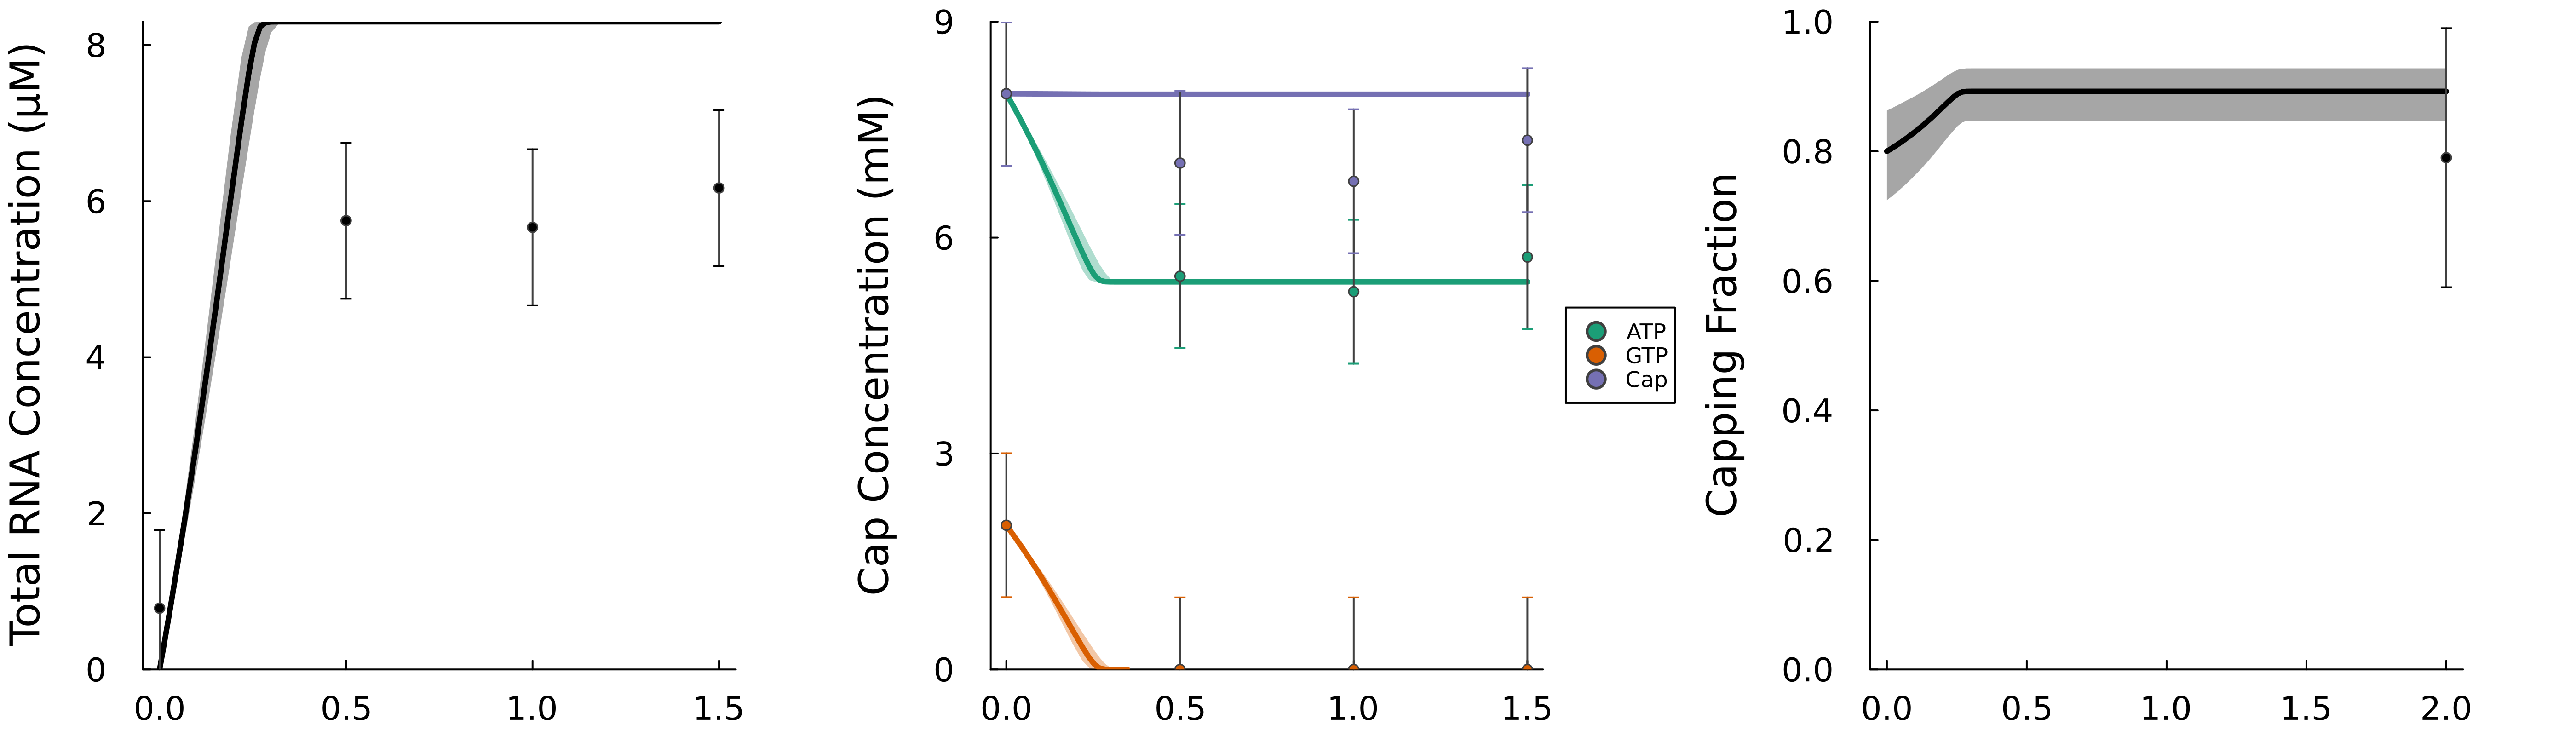

In [30]:
preground3filename = "../data/external/pregljc/pregljccapping.csv"
plt = plot()
discretefeedingschedule = reshape([Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],(1,8))
discretefeedingschedules = [discretefeedingschedule,discretefeedingschedule,discretefeedingschedule]
plt1 = plot()
plotfedbatchfromcsv!(plt1,fittingmodel,pregls,covariancemat,preground3filename,discretefeedingschedules; labels = [""], plotsize = (600,450), range = [11],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :greys)
plt2 = plot()
plotfedbatchfromcsv!(plt2,fittingmodel,pregls,covariancemat,preground3filename,discretefeedingschedules; labels = ["ATP", "GTP", "Cap"], plotsize = (600,450), range = [12,13,14],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :Dark2_3)
plt3 = plot()
plotfedbatchfromcsv!(plt3,fittingmodel,pregls,covariancemat,preground3filename,discretefeedingschedules; labels = [""], plotsize = (600,450), range = [15],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :greys)
plot!(ylims = (0,1))
plt = plot(plt1,plt2,plt3,layout = (1,3),size = (1400,400), leftmargin = 8mm)
plot!(dpi = 400)
savefig(plt,"../figures/GM6_27/pregcapping2.png")
plt

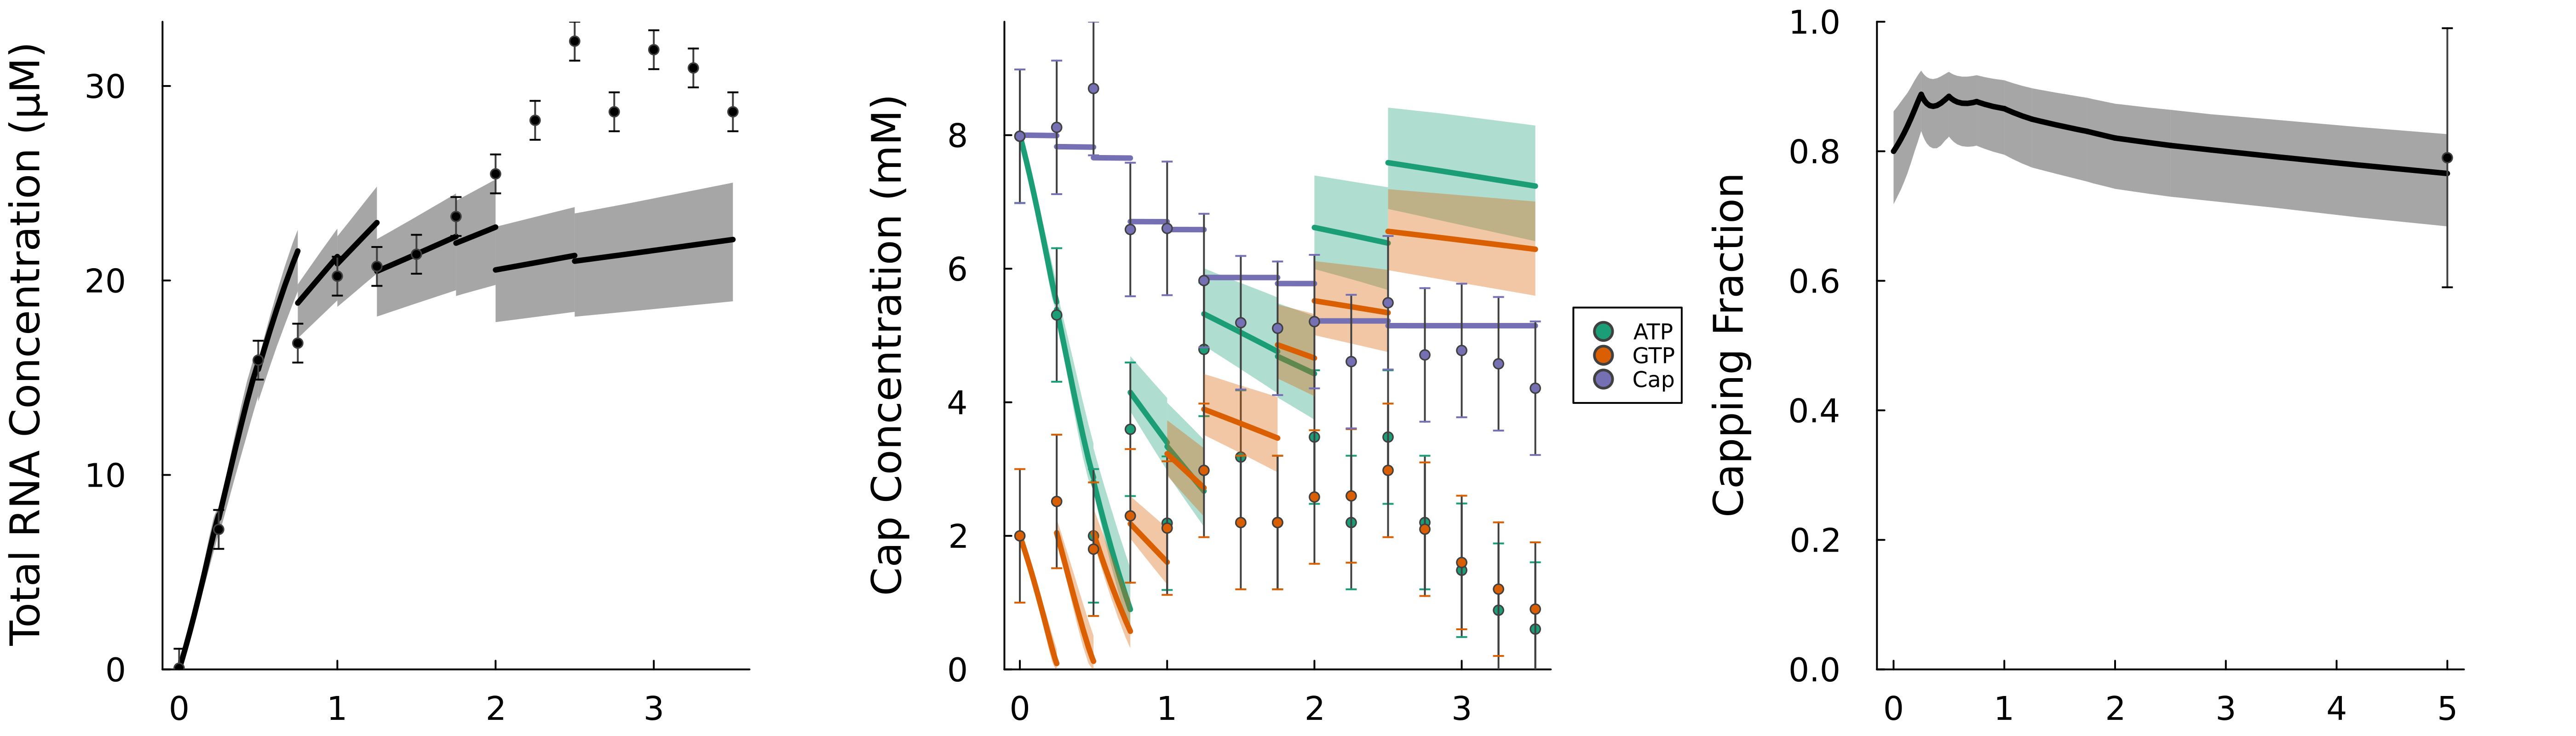

In [31]:
preground3filename = "../data/external/pregljc/pregljccapping.csv"
discretefeedingschedule = [[0.25, 1.125e-3, 0e-3, 0e-3, 0e-3, 2e-3, 0.0, 0.021125] [0.5, 1.125e-3, 0e-3, 0e-3, 0e-3, 2e-3, 0.0, 0.021125] [0.75, 7.875e-3, 4e-3, 4e-3, 4e-3, 2e-3, 0.147875] [1.0, 1.125e-3, 0e-3, 0e-3, 0e-3, 2e-3, 0.021125] [1.25, 7.875e-3, 4e-3, 4e-3, 4e-3, 2e-3, 0.147875] [1.75, 1.125e-3, 0e-3, 0e-3, 0e-3, 2e-3, 0.021125] [2.0, 7.875e-3, 4e-3, 4e-3, 4e-3, 2e-3, 0.147875] [2.5, 1.125e-3, 2e-3, 0e-3, 0e-3, 2e-3, 0.021125] [Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]'
discretefeedingschedules = [discretefeedingschedule,discretefeedingschedule,discretefeedingschedule]
plt1 = plot()
plotfedbatchfromcsv!(plt1,fittingmodel,pregls,covariancemat,preground3filename,discretefeedingschedules; labels = [""], plotsize = (600,450), range = [6],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :greys)
plt2 = plot()
plotfedbatchfromcsv!(plt2,fittingmodel,pregls,covariancemat,preground3filename,discretefeedingschedules; labels = ["ATP", "GTP", "Cap"], plotsize = (600,450), range = [7,8,9],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :Dark2_3)
plt3 = plot()
plotfedbatchfromcsv!(plt3,fittingmodel,pregls,covariancemat,preground3filename,discretefeedingschedules; labels = [""], plotsize = (600,450), range = [10],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :greys)
plot!(ylims = (0,1))
plt = plot(plt1,plt2,plt3,layout = (1,3),size = (1400,400), leftmargin = 8mm)
plot!(dpi = 400)
savefig(plt,"../figures/GM6_27/pregcapping3.png")
plt

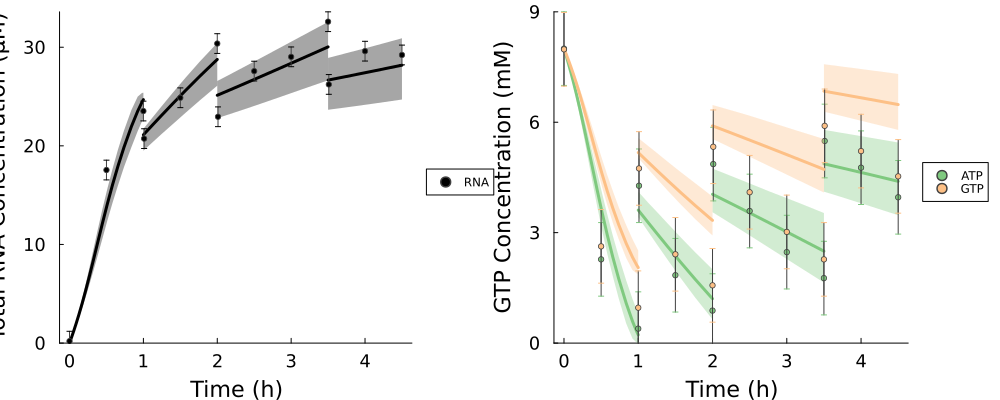

In [32]:
skokdiscretefilename = "../data/external/skok/skokdiscretefeeding.csv"
plt = plot()
discretefeedingschedule = [[1.0, 9e-3, 4e-3, 4e-3, 4e-3, 4e-3, 0.169] [2.0, 9e-3, 4e-3, 4e-3, 4e-3, 4e-3, 0.169] [3.5, 9e-3, 4e-3, 4e-3, 4e-3, 4e-3, 0.169] [Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]'
discretefeedingschedules = [discretefeedingschedule,discretefeedingschedule,discretefeedingschedule]
plt1 = plot()
plotfedbatchfromcsv!(plt1,fittingmodel,pregls,covariancemat,skokdiscretefilename,discretefeedingschedules; labels = ["RNA"], plotsize = (600,450), range = [1],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :greys)
plt2 = plot()
plotfedbatchfromcsv!(plt2,fittingmodel,pregls,covariancemat,skokdiscretefilename,discretefeedingschedules; labels = ["ATP","GTP"], plotsize = (600,450), range = [2,3],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :Accent_3)
plot(plt1,plt2, size = (1000,400),bottommargin = 5mm)

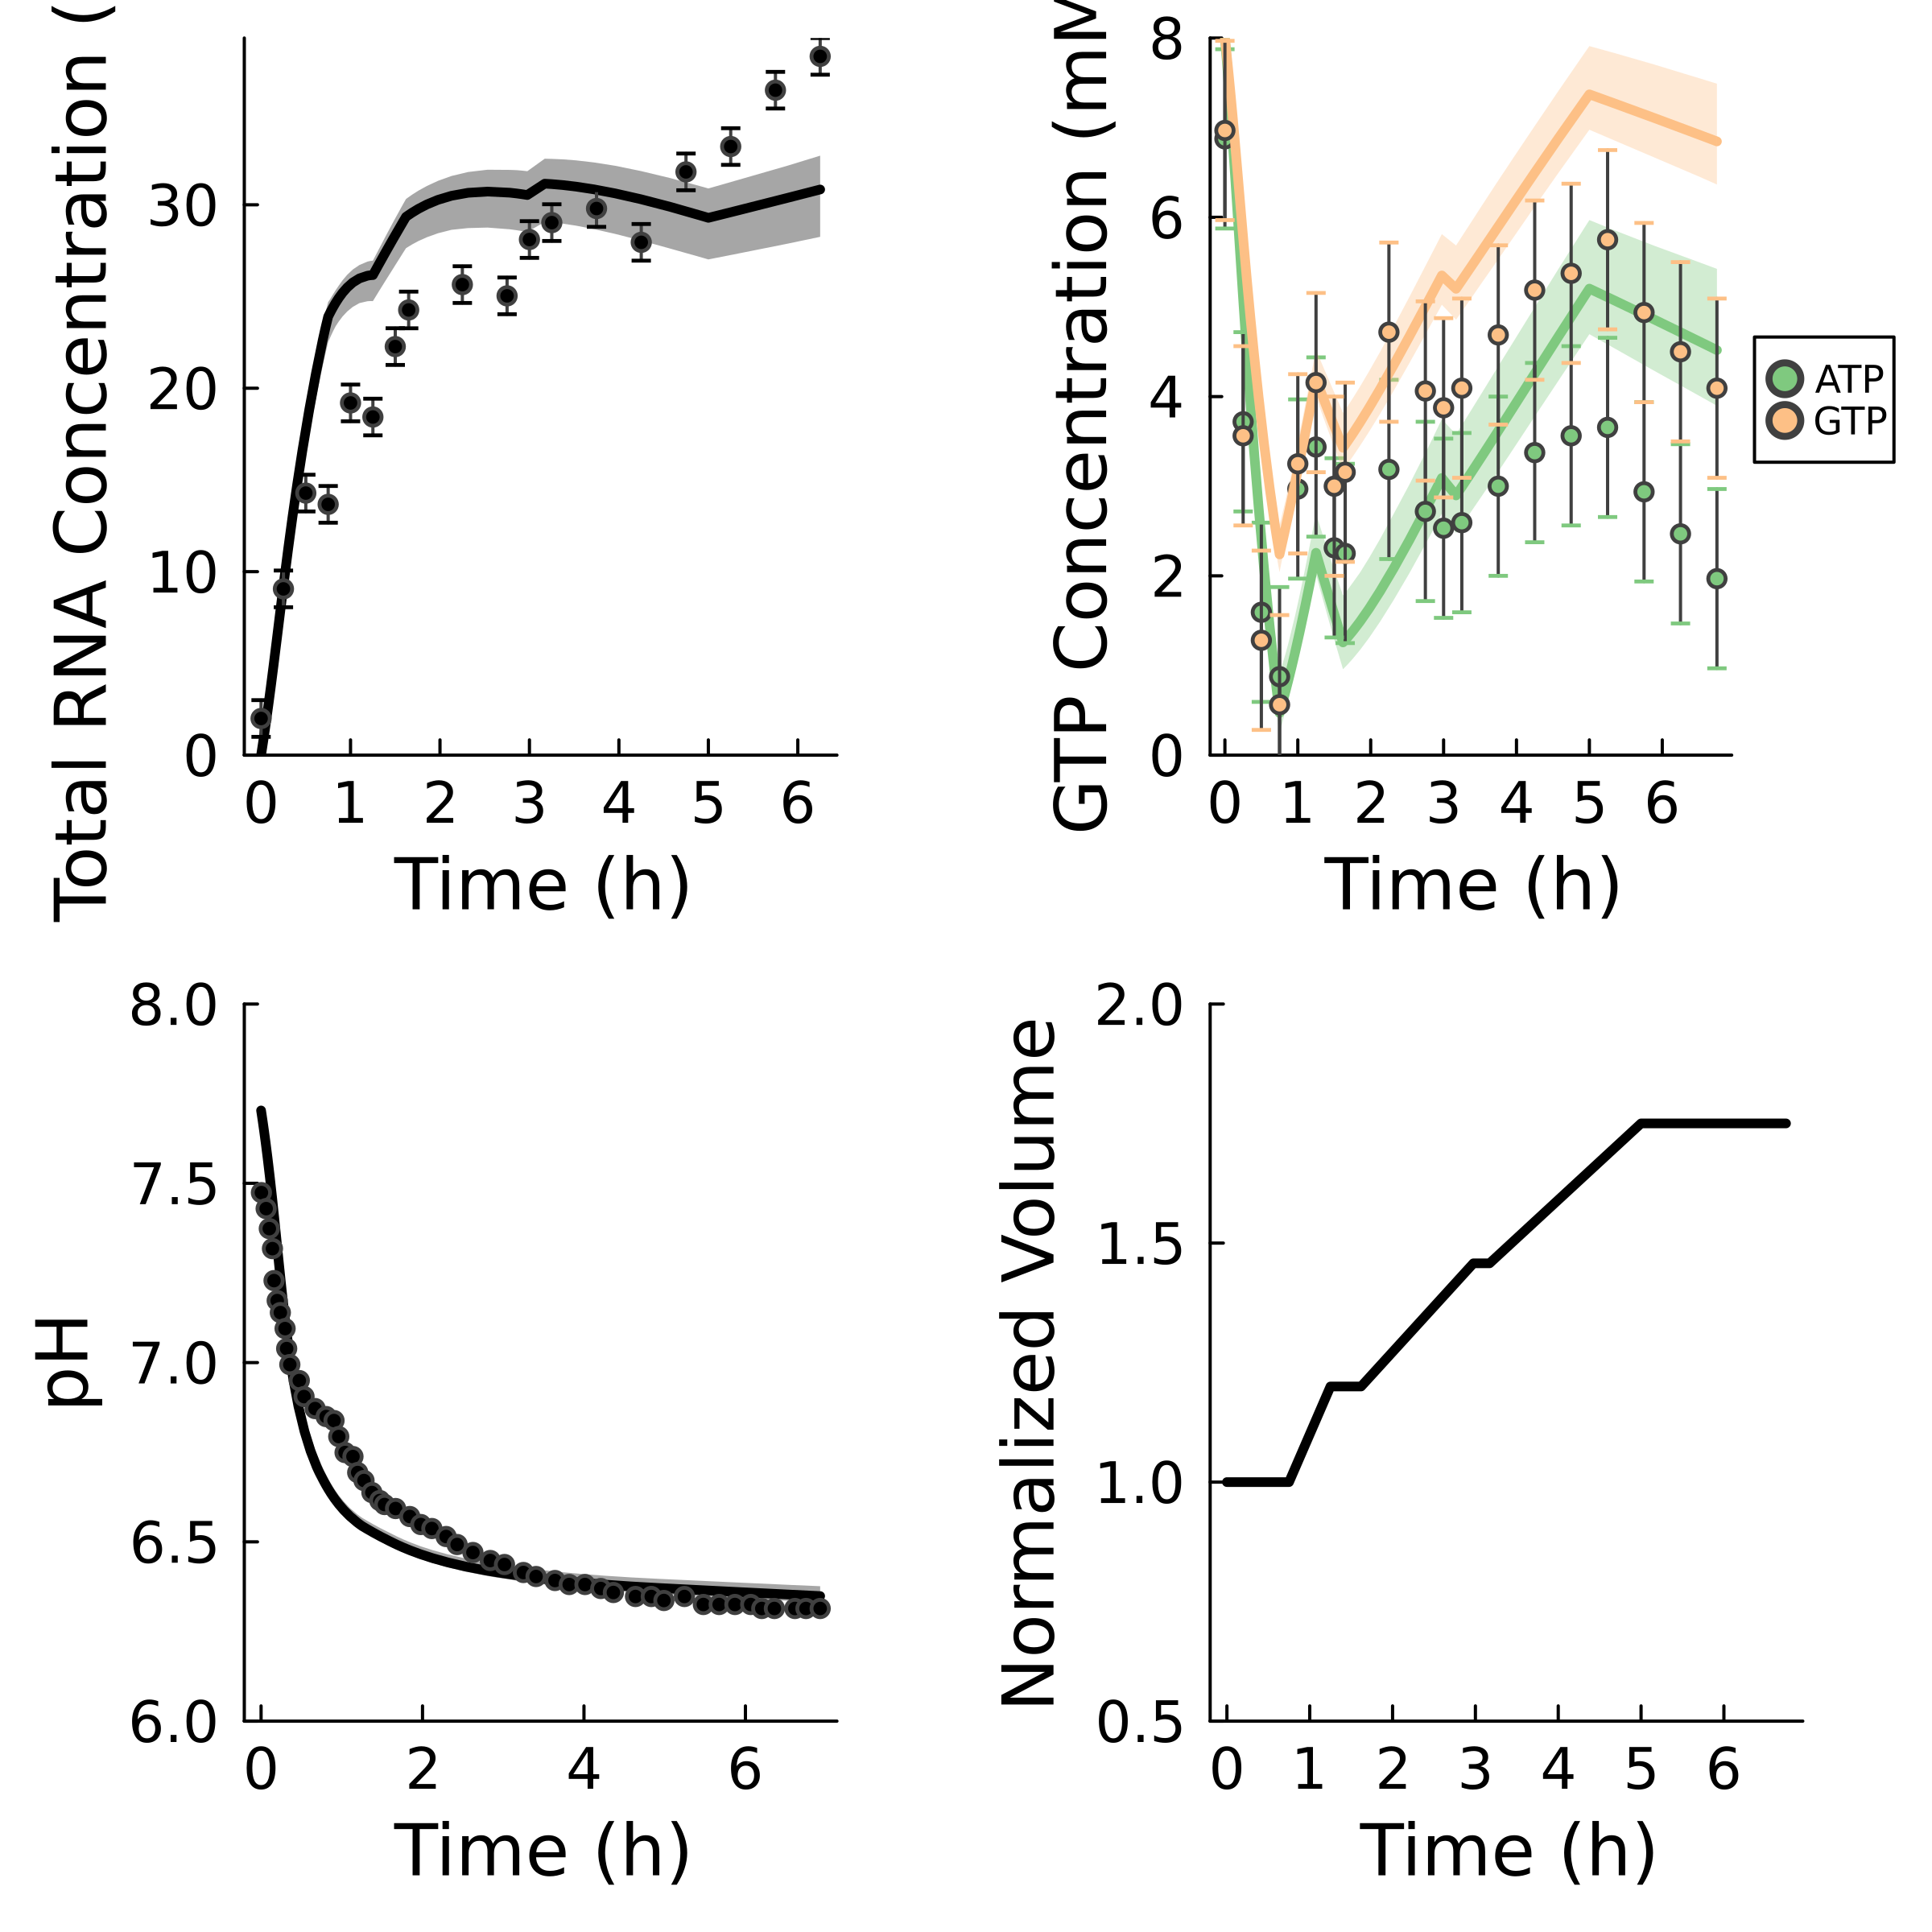

In [33]:
function skokcontinuousfeedingschedule(t)
    eachNTPperliterfeed = 23e-3#In moles
    Mgperliterfeed = 69e-3#moles
    NaperNTP = 3.96
    
    v = skokfeedingvolume(t)#liters per hour
    NTPrate = v*eachNTPperliterfeed
    Mgrate = v*Mgperliterfeed
    
    feeding = zeros(19)
    feeding[7] = NTPrate
    feeding[8] = NTPrate
    feeding[9] = NTPrate
    feeding[10] = NTPrate
    feeding[12] = Mgrate
    feeding[16] = 4*NTPrate*NaperNTP
    feeding[17] = 2*Mgrate
    feeding[19] = v

    return feeding
end

function skokfeedingvolume(t)#scaled up 10x to account for initial volume
    if 0.75<t<1.25
        return 0.4
    elseif 1.62<t<2.976
        return 0.19
    elseif 3.171<t<5.0
        return 0.16
    else
        return 0
    end
end

skokNaperNTP = 3.8
skokcontinuousfilename = "../data/external/skok/skokcontinuousfeeding.csv"
plt = plot()
discretefeedingschedule = reshape([Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],(1,7))
discretefeedingschedules = [discretefeedingschedule,discretefeedingschedule,discretefeedingschedule]
plt0 = plot(markerc = :white)
plotfedbatchfromcsv!(plt1,fittingmodel,pregls,covariancemat,skokcontinuousfilename,discretefeedingschedules; continuousspeciesaddition = skokcontinuousfeedingschedule, labels = [""], plotsize = (600,450), range = [5],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :greys, NaperNTP = skokNaperNTP)
plot!(markersize = 2, ylims = (0.5,2))
plt1 = plot()
plotfedbatchfromcsv!(plt1,fittingmodel,pregls,covariancemat,skokcontinuousfilename,discretefeedingschedules; continuousspeciesaddition = skokcontinuousfeedingschedule, labels = [""], plotsize = (600,450), range = [1],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :greys, NaperNTP = skokNaperNTP)
plt2 = plot()
plotfedbatchfromcsv!(plt2,fittingmodel,pregls,covariancemat,skokcontinuousfilename,discretefeedingschedules; continuousspeciesaddition = skokcontinuousfeedingschedule, labels = ["ATP","GTP"], plotsize = (600,450), range = [2,3],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :Accent_3, NaperNTP = skokNaperNTP)
plt3 = plot()
plotfedbatchfromcsv!(plt3,fittingmodel,pregls,covariancemat,skokcontinuousfilename,discretefeedingschedules; continuousspeciesaddition = skokcontinuousfeedingschedule, labels = [""], plotsize = (600,450), range = [4],dataerrorbars = true, seperateDNA = false, OAccounterion = false, colorscheme = :greys, NaperNTP = skokNaperNTP)
plot!(ylims = (6,8))
plt = plot(plt1,plt2,plt3,plt0, size = (600,600),layout = (2,2),bottommargin = 0mm)
plot!(dpi = 400)
savefig(plt,"../figures/GM6_27/skokcont.png")
plt